# 1.1 Introduction

# 1.2 Problem Statement

# 1.3 Main Objective

# 1.4 Specific Objectives

# 1.5 Notebook Structure

### Introduction </br>
### Problem Statement </br>
### Main Objective </br>
### Specific Objectives </br>
### Importing Libraries </br>
### Data Understanding </br>
### Data Cleaning </br>
### Modelling </br>
### Regression Results </br>
### Data Visualizations </br>
### Conclusions </br>
### Recommendations </br>
### References </br>

## 2. Importing Libraries and filtering warnings

In [1]:
#import the relevant libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# 3. Data Understanding

In [2]:
# Opening the csv file
data = pd.read_csv("Data/kc_house_data.csv")

# Viewing both the head and the tail of the data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Checking data in tabular form
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Viewing the shape of the data
data.shape

(21597, 21)

In [5]:
# viewing data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<Axes: ylabel='Density'>

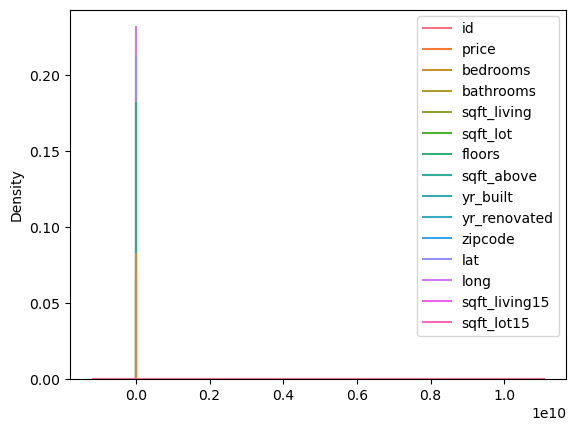

In [6]:
# Let's see how it looks visually
sns.kdeplot(data)

We will compare and contrast this density plot before cleaning and after cleaning later on. </br>
For now, let's clean

# 4. Data cleaning

## 4.1 Missing Values

Let's check for any missing data

In [7]:
data.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Waterfront and yr_renovated have missing values. Let's see what type of missing values they have to decide how we are going to handle the situation.

In [9]:
data["waterfront"].value_counts(dropna = False)

waterfront
NO     19075
NaN     2376
YES      146
Name: count, dtype: int64

In [10]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: count, Length: 71, dtype: int64

For the waterfront, let's fill the missing values with unknown i.e a house may have a waterfront (yes), or not (no), or in this case, we don't know

In [11]:
data["waterfront"].fillna("Unknown", inplace = True)
data["waterfront"]

0        Unknown
1             NO
2             NO
3             NO
4             NO
          ...   
21592         NO
21593         NO
21594         NO
21595    Unknown
21596         NO
Name: waterfront, Length: 21597, dtype: object

Now we tackle yr_renovated to see how we will tackle the missing values

In [12]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: count, Length: 71, dtype: int64

In [13]:
data["yr_renovated"].value_counts(dropna = False).sum()

21597

We can not do the same for the missing values for the column of yr_renovated. This is because the missing values take up a whooping 96.5551% of the entire column. The best way to deal with them is to drop them.

In [14]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: count, Length: 71, dtype: int64

In [15]:
# Change values which are 0 to NaN
data["yr_renovated"].replace(0, np.nan, inplace = True)

# Drop all NaN values
data.dropna(subset = ["yr_renovated"], inplace = True)

Let's confirm if we've dropped the missing values

In [16]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
2014.0    73
2013.0    31
2003.0    31
2007.0    30
2000.0    29
          ..
1951.0     1
1953.0     1
1946.0     1
1976.0     1
1948.0     1
Name: count, Length: 69, dtype: int64

## 4.2 Duplicates

In [17]:
data.duplicated().any()

False

There are no duplicates in our data

## 4.3 Removing outliers

# filter data for yr_built and yr_renovated
Using renovation dates as way back as 1940s is not realistic now that design changes way too often. It would be better off to use 2000 and above dataset.
Also, having houses built before 1950 will not make much sense. This is because mortgages at this time were changing with the end of world war two and have been rising quite steadly ever since

In [18]:
# # filter data above 2000
data = data[(data["yr_renovated"] > 2000) & (data["yr_built"] > 1950)]

Now let's take a look at our final data after cleaning it

## 4.4 Final data

In [19]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
274,4235400186,11/24/2014,331000.0,3,1.75,1080,1306,1.0,NO,NONE,...,7 Average,580,500.0,1954,2003.0,98199,47.6601,-122.400,1440,2225
330,3179100060,9/16/2014,880000.0,4,3.50,2800,6750,2.0,Unknown,NONE,...,9 Better,1890,910.0,1951,2002.0,98105,47.6690,-122.275,2370,6120
435,2268400350,9/16/2014,749000.0,4,2.50,1710,9627,1.0,NO,NONE,...,9 Better,1440,270.0,1976,2014.0,98006,47.5590,-122.164,2140,9131
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,Unknown,FAIR,...,11 Excellent,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697
950,9455200445,3/25/2015,601000.0,3,1.75,1330,6743,1.0,NO,NONE,...,8 Good,1330,0.0,1958,2002.0,98125,47.7012,-122.286,2600,7350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,11/4/2014,257000.0,3,1.75,1397,18000,1.0,NO,NONE,...,7 Average,1397,0.0,1965,2014.0,98092,47.3388,-122.166,1950,31294
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,NO,NONE,...,7 Average,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,NO,NONE,...,8 Good,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539
20431,3319500628,2/12/2015,356999.0,3,1.50,1010,1546,2.0,Unknown,NONE,...,8 Good,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517


<Axes: ylabel='Density'>

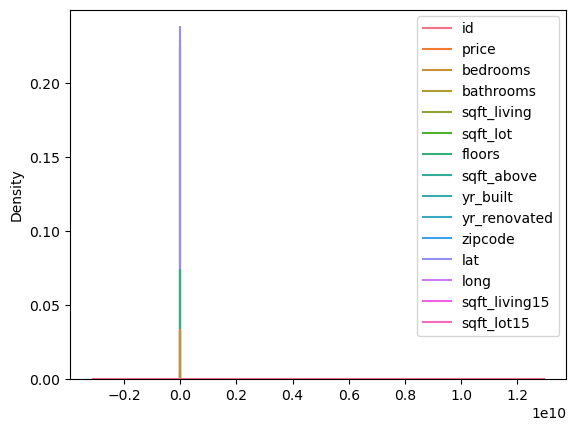

In [20]:
# Let's see how it looks visually
sns.kdeplot(data)

The density plot here shows a very different picture to the one before the data was cleaned </br>
Now that the missing values were either removed or replaced, the figures became different, and so did the visual. </br>
The green line which was the longest, has now been shrinked. It's no surprised since it represented yr_built and yr_renovated of which both have been filtered

# 5. Modelling

Let's identify the most relevant data to work with and why

1. Price </br>
Price (in some datasets; sales) is the most important since other columns are measured against it. We will use it as the TARGET VARIABLE.
2. Bedrooms </br>
The number of rooms a building has highly influences its price tag.
3. Floors </br>
The more a building has floors the more it will cost.
4. sqft_lot </br>
The larger the square lot of a building, the more it will cost.
5. yr_renovated </br>
The more recent a house is renovated, the more expensive it will be as opposed to a house renovated a long time ago. Say in the 2000s.

Relationship between this data features and the target variable (price)

In [29]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
274,4235400186,11/24/2014,331000.0,3,1.75,1080,1306,1.0,NO,NONE,...,7 Average,580,500.0,1954,2003.0,98199,47.6601,-122.400,1440,2225
330,3179100060,9/16/2014,880000.0,4,3.50,2800,6750,2.0,Unknown,NONE,...,9 Better,1890,910.0,1951,2002.0,98105,47.6690,-122.275,2370,6120
435,2268400350,9/16/2014,749000.0,4,2.50,1710,9627,1.0,NO,NONE,...,9 Better,1440,270.0,1976,2014.0,98006,47.5590,-122.164,2140,9131
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,Unknown,FAIR,...,11 Excellent,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697
950,9455200445,3/25/2015,601000.0,3,1.75,1330,6743,1.0,NO,NONE,...,8 Good,1330,0.0,1958,2002.0,98125,47.7012,-122.286,2600,7350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,11/4/2014,257000.0,3,1.75,1397,18000,1.0,NO,NONE,...,7 Average,1397,0.0,1965,2014.0,98092,47.3388,-122.166,1950,31294
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,NO,NONE,...,7 Average,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,NO,NONE,...,8 Good,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539
20431,3319500628,2/12/2015,356999.0,3,1.50,1010,1546,2.0,Unknown,NONE,...,8 Good,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517


In [35]:
price_corr = data[["bedrooms", "sqft_lot", "floors", "yr_renovated", "price"]]
price_corr.corr()

,bedrooms,sqft_lot,floors,yr_renovated,price
bedrooms,1.000000,0.093797,0.217276,-0.050771,0.400398
sqft_lot,0.093797,1.000000,0.060848,-0.125350,0.043083
floors,0.217276,0.060848,1.000000,-0.236741,0.224229
yr_renovated,-0.050771,-0.125350,-0.236741,1.000000,-0.226511
price,0.400398,0.043083,0.224229,-0.226511,1.000000


In [28]:
# Checking how many houses have each number of bedrooms
data["bedrooms"].value_counts()

bedrooms
3    62
4    55
5    23
2     5
6     3
7     2
Name: count, dtype: int64

In [21]:
y = data["price"]
x = data["bedrooms"]

bedrooms_models = sm.OLS(y, sm.add_constant(x)).fit()

In [22]:
bedrooms_models.params

const      -106478.756740
bedrooms    267991.384566
dtype: float64

In [23]:
bedrooms_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     28.26
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           3.84e-07
Time:                        15:25:40   Log-Likelihood:                -2198.7
No. Observations:                 150   AIC:                             4401.
Df Residuals:                     148   BIC:                             4407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.065e+05   1.95e+05     -0.547      0.585   -4.91e+05    2.78e+05
bedrooms     2.68e+05   5.04e+04      5.316      0.000    1.68e+05    3.68e+05
==============================================================================
Omnibus:                       93.247   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.837
Skew:                           2.193   Prob(JB):                    9.33e-136
Kurtosis:                      11.959   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
"""

"""

'\n\n'